## ML Model

In [2]:
from action.core import load_action
from preprocessor.features import *
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
import json
import numpy as np

In [63]:
PATH = "data/actions/"
X = []
y = []
gameids = ["0021500149", "0021500197", "0021500270", "0021500316",
           "0021500350", "0021500428", "0021500476", "0021500582"]
dtw = []
dist = []
canon = []
entp = []

In [10]:
_0021500149 = json.load(open(PATH + gameids[0] + ".json"))
_0021500197 = json.load(open(PATH + gameids[1] + ".json"))
_0021500270 = json.load(open(PATH + gameids[2] + ".json"))
_0021500316 = json.load(open(PATH + gameids[3] + ".json"))
_0021500350 = json.load(open(PATH + gameids[4] + ".json"))
_0021500428 = json.load(open(PATH + gameids[5] + ".json"))
_0021500476 = json.load(open(PATH + gameids[6] + ".json"))
_0021500582 = json.load(open(PATH + gameids[7] + ".json")) 

In [11]:
ekeys = [_0021500149, _0021500197, _0021500270, _0021500316, _0021500350, _0021500428, _0021500476, _0021500582]

In [64]:
print "LOADING ACTIONS..."
for ekey in ekeys:
    for eid in sorted(ekey.keys()):
        try:
            gid = ekey[eid]['gameid']
            action = load_action(gid, eid)
            _dtw  = get_DTW(action)
            _dist = get_mean_distance(action)
            _canon = get_mean_distance_from_cannonical_position(action)
            _entp = get_entropy(action)
            dtw.append(_dtw)
            canon.append(_canon)
            dist.append(_dist)
            entp.append(_entp)
            X.append(_dtw + _entp)
            y.append(int(action.label))
        except Exception:
            print gid + " | " + str(eid)
X = np.matrix(X)
y = np.array(y)

LOADING ACTIONS...
0021500350 | 393
0021500350 | 520
0021500350 | 523
0021500428 | 428
0021500428 | 441
0021500428 | 502
0021500476 | 86
0021500582 | 113
0021500582 | 139
0021500582 | 364
0021500582 | 407


In [65]:
zone_dtw = [dtw[index] for index, value in enumerate(y) if value == -1]
man_dtw = [dtw[index] for index, value in enumerate(y) if value == 1]

zone_canon = [canon[index] for index, value in enumerate(y) if value == -1]
man_canon = [canon[index] for index, value in enumerate(y) if value == 1]

zone_dist = [dist[index] for index, value in enumerate(y) if value == -1]
man_dist = [dist[index] for index, value in enumerate(y) if value == 1]

zone_entp = [entp[index] for index, value in enumerate(y) if value == -1]
man_entp = [entp[index] for index, value in enumerate(y) if value == 1]

In [23]:
np.mean(man_dist, axis=1)

array([  8.88964387,   9.7513974 ,   8.65123689,   5.60182999,
         9.4482918 ,   9.43850024,   8.95858409,   8.50213733,
         8.25511415,  10.43330826,   9.14469374,   9.30804467,
         8.24360681,  10.0109516 ,  11.69210873,   7.46889886,
         8.57233883,   9.2970277 ,   9.81475601,  11.86376812,
         8.61700789,  15.27802871,  12.82153081,   9.56683941,
         7.32842773,   7.30592401,   9.33701324,   6.18350016,
        15.0400794 ,   7.90434009,  12.28197628,   7.56593793,
        12.74957401,   9.47418933,   7.24787204,  11.42195168,
        13.88906359,   9.47545785,   9.38204108,   6.03965164,
         9.30460263,   6.97379405,   8.87584554,  10.31361209,
         8.48583954,   6.87352532,  12.04051   ,  12.68474454,
        10.60392998,  11.0473864 ,   7.93103269,   6.61493882,
         6.92865295,  16.37186902,  15.81139976,   7.94428294,
        10.16691866,  11.15245635,  12.38943711,   6.45884971,
        10.44603434,  10.97979772,   9.85401353,   7.77

In [83]:
np.mean(zone_dtw[0])

2967.8720392201617

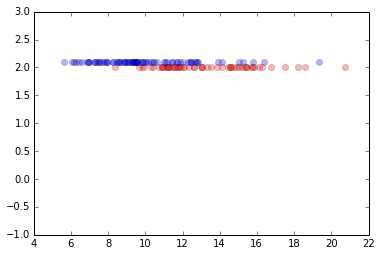

In [87]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(np.mean(zone_dist, axis=1), [2 for i in zone_entp], 'ro', alpha=0.3)
plt.plot(np.mean(man_dist, axis=1), [2.1 for i in man_entp], 'bo', alpha=0.3)

#plt.plot(np.mean(zone_canon, axis=1)[:45], [1 for i in zone_entp][:45], 'ro', alpha=0.1)
#plt.plot(np.mean(man_canon, axis=1)[:45], [1.1 for i in man_entp][:45], 'bo', alpha=0.1)
plt.ylim((-1,3))
plt.show()

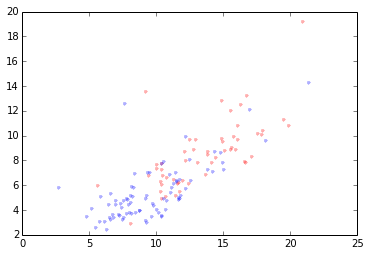

In [123]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(np.median(zone_dist, axis=1), np.mean(zone_canon, axis=1), 'r.', alpha=0.3)
plt.plot(np.median(man_dist, axis=1), np.mean(man_canon, axis=1), 'b.', alpha=0.3)

#plt.plot(np.mean(zone_canon, axis=1)[:45], [1 for i in zone_entp][:45], 'ro', alpha=0.1)
#plt.plot(np.mean(man_canon, axis=1)[:45], [1.1 for i in man_entp][:45], 'bo', alpha=0.1)
# plt.ylim((-1,3))
plt.show()

In [129]:
X = []
for index in range(len(dist)):
    X.append([np.mean(dist[index]), np.mean(canon[index])])
X = np.matrix(X)
X

matrix([[  8.88964387,   3.0221562 ],
        [  9.7513974 ,   5.2061474 ],
        [  8.65123689,   5.35257546],
        [  5.60182999,   3.15229193],
        [  9.4482918 ,   5.8438287 ],
        [  9.43850024,   4.94830205],
        [  8.95858409,   3.15771423],
        [  8.50213733,   4.49769047],
        [  8.25511415,   3.99648888],
        [ 10.43330826,   4.81033722],
        [ 12.98271996,   9.7110694 ],
        [ 13.29445281,   8.24545469],
        [ 11.16350203,   5.55744751],
        [  9.14469374,   4.40254043],
        [ 11.78350464,   7.99576262],
        [  9.30804467,   3.84547905],
        [ 14.53006204,   9.69158254],
        [  8.24360681,   3.81650654],
        [ 10.0109516 ,  12.62208355],
        [ 11.69210873,   5.41370791],
        [  7.46889886,   3.70861321],
        [  8.57233883,   3.82064839],
        [ 12.00421941,   6.43959419],
        [ 13.55812012,   8.78981824],
        [ 11.23125162,   6.47564582],
        [ 12.32273469,   7.88076987],
        [ 14

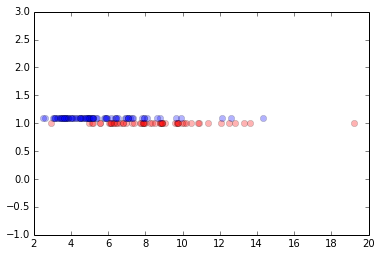

In [78]:
import matplotlib.pyplot as plt
%matplotlib inline
#plt.plot(zone_dtw[:45], [2 for i in zone_entp][:45], 'ro', alpha=0.1)
#plt.plot(man_dtw[:45], [2.1 for i in man_entp][:45], 'bo', alpha=0.1)

plt.plot(np.mean(zone_canon, axis=1), [1 for i in zone_entp], 'ro', alpha=0.3)
plt.plot(np.mean(man_canon, axis=1), [1.1 for i in man_entp], 'bo', alpha=0.3)
plt.ylim((-1,3))
plt.show()

In [141]:
print "SPLITTING DATA..."
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

SPLITTING DATA...


In [142]:
print "BUILDING MODEL..."
clf = SVC()
clf.fit(X_train, y_train)
y_pred = [clf.predict(x)[0] for x in X_test]
zip(y_pred, y_test)

BUILDING MODEL...


[(-1, -1),
 (1, 1),
 (-1, 1),
 (1, -1),
 (1, -1),
 (-1, 1),
 (1, 1),
 (1, 1),
 (-1, -1),
 (1, -1),
 (1, 1),
 (1, 1),
 (1, 1),
 (-1, -1),
 (1, 1),
 (-1, -1),
 (1, 1),
 (1, 1),
 (-1, -1),
 (1, 1),
 (-1, -1),
 (1, 1),
 (-1, -1),
 (-1, -1),
 (-1, 1),
 (-1, -1),
 (-1, 1),
 (1, 1),
 (-1, -1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (-1, 1),
 (1, 1),
 (1, -1),
 (1, -1),
 (-1, 1),
 (1, 1),
 (-1, 1),
 (-1, 1),
 (-1, -1),
 (-1, -1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, -1),
 (1, 1),
 (-1, -1),
 (1, -1),
 (1, 1),
 (-1, -1)]

In [143]:
print "SHOWING METRICS..."
print confusion_matrix(y_test, y_pred)
print clf.score(X_test, y_test)

SHOWING METRICS...
[[14  7]
 [ 8 26]]
0.727272727273


In [ ]:


print "SHOWING METRICS..."
print confusion_matrix(y_test, y_pred)
print clf.score(X_test, y_test)